In [21]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter

# Load the dataset
file_path_latest = 'combined_data_2021_2022_2023.csv'
df_latest = pd.read_csv(file_path_latest)


This preprocesses the FOI_TEXT column of the dataset by converting text to lowercase, tokenizing, removing stopwords, and applying lemmatization. Rare words are excluded to retain significant terms. The cleaned text is then vectorized to extract unigrams and bigrams, with the top 20 bigrams visualized using a horizontal bar chart. Additionally, the calculates the total word count before and after preprocessing, highlighting a reduction in text size and ensuring a cleaner dataset for further analysis.

In [ ]:
#Import libarary
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Lemmatization and removing stop words
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    
    # Remove words that appear less than 10 times
    word_counts = Counter(tokens)
    tokens = [token for token in tokens if word_counts[token] >= 10]
    
    return ' '.join(tokens)

# Apply preprocessing to the 'FOI_TEXT' column
df_latest['PROCESSED_TEXT'] = df_latest['FOI_TEXT'].apply(preprocess_text)

# Vectorize the text to get unigrams and bigrams
vectorizer = CountVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(df_latest['PROCESSED_TEXT'])

# Display the processed text and the shape of the resulting matrix
df_latest[['FOI_TEXT', 'PROCESSED_TEXT']].head(), X.shape


### Top 10 Bigrams

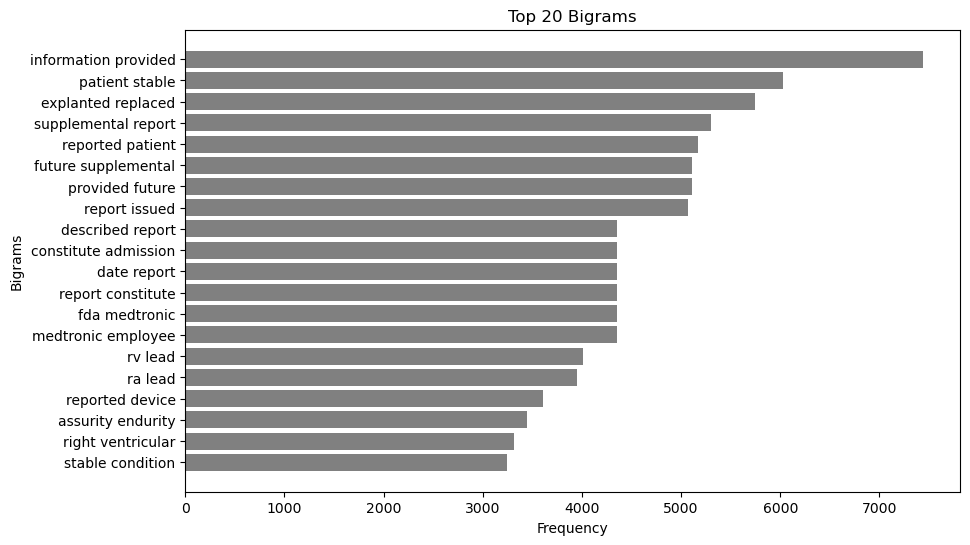

In [23]:
# Vectorize the text to get bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(df['PROCESSED_TEXT'])

# Get the bigram frequencies
bigram_counts = X.sum(axis=0).A1
bigrams = vectorizer.get_feature_names_out()
bigram_freq = dict(zip(bigrams, bigram_counts))

# Get the top 20 bigrams
top_bigrams = Counter(bigram_freq).most_common(20)

# Plot the top 20 bigrams
bigram_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])

plt.figure(figsize=(10, 6))
plt.barh(bigram_df['Bigram'], bigram_df['Frequency'], color='gray')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Top 20 Bigrams')
plt.gca().invert_yaxis()
plt.show()


In [25]:
# Count the total number of words before and after preprocessing
df_latest['PROCESSED_TEXT'] = df_latest['FOI_TEXT'].apply(preprocess_text)

# Total number of words before preprocessing
total_words_before = df_latest['FOI_TEXT'].apply(lambda x: len(x.split())).sum()

# Total number of words after preprocessing
total_words_after = df_latest['PROCESSED_TEXT'].apply(lambda x: len(x.split())).sum()

# Calculate the reduction
reduction = total_words_before - total_words_after
reduction_percentage = (reduction / total_words_before) * 100

total_words_before, total_words_after, reduction, reduction_percentage


(1347310, 23287, 1324023, 98.27159302610386)